# Exercise Set: Linear and Logistic Regression

## Setup

Load packages

In [18]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

Mount Google Drive / load Framingham data

In [ ]:
# Mount the Google Drive folder again:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Oregon data
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Intro to Python for Epidemiologists/Data/frmgham2.csv')
print(df.shape)
df.head()

## 1. Modeling total cholesterol in the Framingham study

Is there an association between BMI and total cholesterol? Is this relationship different for people with and without diabetes? First graph the relationship, then test it in a multiple linear regression. Hint: consider modeling an interaction effect.

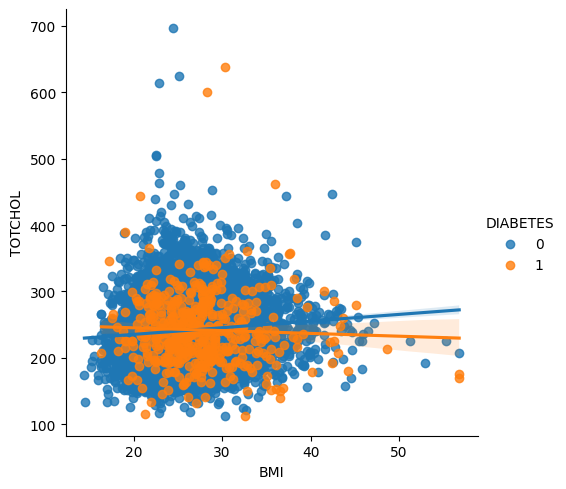

In [20]:
sns.lmplot(data = df, x = 'BMI', y = 'TOTCHOL', hue = 'DIABETES')

In [21]:
model1 = smf.ols('TOTCHOL ~ BMI*DIABETES', data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                TOTCHOL   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     28.50
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           2.37e-18
Time:                        22:37:59   Log-Likelihood:                -58409.
No. Observations:               11173   AIC:                         1.168e+05
Df Residuals:                   11169   BIC:                         1.169e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      215.3053      2.852     75.500      0.000     209.715     220.895
BMI              1.0026      0.109      9.169      0.000       0.788       1.217
DIABETES        38.3283     10.988      3.488      0.000      16.790      59.866
BMI:DIABETES    -1.4227      0.394     -3.614      0.000      -2.194      -0.651
==============================================================================
Omnibus:                     1828.329   Durbin-Watson:                   1.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6371.855
Skew:                           0.812   Prob(JB):                         0.00
Kurtosis:                       6.325   Cond. No.                         677.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2. Relationship between diabetes and stroke

For all following exercises, we will only investigate the most recent observation for each participant, so you should create a new dataframe that contains only those. Then answer the following questions:

- What is the risk of having ever had any coronary heart disease (`ANYCHD`) among those with diabetes?
- What's the risk among those without diabetes?
- What are the risk ratio, risk difference, and odds ratio? Use the 'manual' calculation of effect measures for this as shown in lecture 4.4.

In [22]:
lastobs = df.sort_values(by=['RANDID','AGE']).groupby('RANDID', as_index=False).last()
lastobs.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,209.0,52,121.0,66.0,0,0.0,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
2,9428,1,283.0,54,141.0,89.0,1,30.0,25.34,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,10552,2,232.0,67,183.0,109.0,1,20.0,30.18,0,...,1,1,2956,2956,2956,2956,2089,2089,2956,0
4,11252,2,343.0,58,155.0,90.0,1,30.0,24.61,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,4285


In [23]:
ctab = pd.crosstab(lastobs['DIABETES'],lastobs['ANYCHD'])
ctab

ANYCHD,0,1
DIABETES,,
0,3030,1066
1,164,174


In [24]:
a, b = ctab.iloc[0]
c, d = ctab.iloc[1]
print(a, b, c, d)

3030 1066 164 174


In [25]:
risk_dia = d / (c + d)
risk_nondia = b / (a + b)
print('Risk of any CHD for those with diabetes = %.2f, risk for those without = %.2f'%(risk_dia, risk_nondia))

Risk of any CHD for those with diabetes = 0.51, risk for those without = 0.26


In [26]:
rr = risk_dia / risk_nondia
rd = risk_dia - risk_nondia
print('RR = %.2f, RD = %.2f'%(rr, rd))

RR = 1.98, RD = 0.25


In [27]:
odds_dia = d / c
odds_nondia = b / a
or_manual = odds_dia / odds_nondia
print('OR = %.2f'%or_manual)

OR = 3.02


## 3. Logistic regression

Compute the odds ratio again, now using logistic regression. Do this by modeling `ANYCHD` as a function of `DIABETES` using `smf.logit()`.

In [11]:
model2 = smf.logit('ANYCHD ~ DIABETES', data = lastobs).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.582423
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 ANYCHD   No. Observations:                 4434
Model:                          Logit   Df Residuals:                     4432
Method:                           MLE   Df Model:                            1
Date:                Mon, 28 Apr 2025   Pseudo R-squ.:                 0.01722
Time:                        22:34:43   Log-Likelihood:                -2582.5
converged:                       True   LL-Null:                       -2627.7
Covariance Type:            nonrobust   LLR p-value:                 1.842e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0446      0.036    -29.335      0.000      -1.114      -0.975
DIABETES       1.1038      0.115      9.640      0.000       0.879       1.328
==============================================================================
"""

In [12]:
ORs = np.exp(model2.conf_int())
ORs.columns = ['2.5%', '97.5%']
ORs['OR'] = np.exp(model2.params)
ORs

,2.5%,97.5%,OR
Intercept,0.328097,0.377248,0.351815
DIABETES,2.409455,3.774530,3.015719


The obtained OR should match the one you got when manually computing it.

Now run the logistic regression again, controlling for systolic blood pressure, age, and sex. What do you notice?

In [28]:
model3 = smf.logit('ANYCHD ~ DIABETES + SYSBP + AGE + SEX', data = lastobs).fit()
model3.summary()

Optimization terminated successfully.
         Current function value: 0.544834
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 ANYCHD   No. Observations:                 4434
Model:                          Logit   Df Residuals:                     4429
Method:                           MLE   Df Model:                            4
Date:                Mon, 28 Apr 2025   Pseudo R-squ.:                 0.08065
Time:                        22:40:21   Log-Likelihood:                -2415.8
converged:                       True   LL-Null:                       -2627.7
Covariance Type:            nonrobust   LLR p-value:                 1.951e-90
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7397      0.299    -12.494      0.000      -4.326      -3.153
DIABETES       0.8694      0.120      7.227      0.000       0.634       1.105
SYSBP          0.0148      0.002      9.617      0.000       0.012       0.018
AGE            0.0320      0.004      7.448      0.000       0.024       0.040
SEX           -0.8754      0.071    -12.247      0.000      -1.016      -0.735
==============================================================================
"""

In [29]:
ORs = np.exp(model3.conf_int())
ORs.columns = ['2.5%', '97.5%']
ORs['OR'] = np.exp(model3.params)
ORs

,2.5%,97.5%,OR
Intercept,0.013216,0.042721,0.023761
DIABETES,1.884476,3.019863,2.385552
SYSBP,1.011819,1.017923,1.014866
AGE,1.023890,1.041305,1.032561
SEX,0.362218,0.479358,0.416692


Explained variance (pseudo-R-squared) went up from about 2% to about 8%. Systolic BP, age, and sex are all significant predictors. And the OR for diabetes has dropped from 3.02 to 2.39.